<a href="https://colab.research.google.com/github/ram-elgov/Introduction-to-Data-Science/blob/main/id1_id2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Submission Guidelines:
### Since the HW grading is done in a semi-automatic manner, please adhere to the following naming format for your submission. Each group of students (mostly pairs, with some approved exceptions) should submit a Jupyter notebook (.ipynb file and not a .zip file) whose name is the underscored-separated id list of all the submitters. For example, for two submitters, the naming format is: id1_id2.ipynb.

# Data Understanding and Data Preparation Exercise
### Courtesy of Intel Advanced Analytics



In this exercise you will explore data that is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed.

Data source:
 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.

Good luck!

# Q1


## Familiarizing yourself with the data

1) Download the 'bank-full_2016.csv' database to a local directory, and load it into a DataFrame object: http://slavanov.com/teaching/ds1617b/bank-full_2016.csv

In [ ]:
# Installations and setup
drive.mount('/content/drive')
!pip install gdown

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import numpy as np
import pandas as pd
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import gdown
from scipy.stats import entropy
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
# Google Drive file ID
file_id = '1hmPERRWfBinYWBoMbBnn8m6MxiBf8zPJ'
# URL format for gdown
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'bank-full_2016.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1hmPERRWfBinYWBoMbBnn8m6MxiBf8zPJ
To: /content/bank-full_2016.csv
100%|██████████| 4.61M/4.61M [00:00<00:00, 31.2MB/s]


'bank-full_2016.csv'

In [ ]:
df = pd.read_csv(output)
# Adjust display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
# Verify data is loaded correctly
print(df.head())

   age           job  marital  education default_credit  balance housing_loan personal_loan  contact  day month  duration  campaign  days_from_last_contact  previous_campaign_contacts previous_campaign_outcome outcome
0   58    management  married   tertiary             no     2143          yes            no  unknown    5   may       261         1                     NaN                           0                   unknown      no
1   44    technician   single  secondary             no       29          yes            no  unknown    5   may       151         1                     NaN                           0                   unknown      no
2   33  entrepreneur  married  secondary             no        2          yes           yes  unknown    5   may        76         1                     NaN                           0                   unknown      no
3   47   blue-collar  married    unknown             no     1506          yes            no  unknown    5   may        92       

2) Explore your data a bit:
- What are the dimensions of the table?
- What are the different attributes in it?
- Return a frequency table of the "outcome" category in the table - i.e return all the possible values in that category, and how many times each value is present in the table.
- Display the first 5 rows of the table.

In [ ]:
# Dimensions of the table
dimensions = df.shape
print("Dimensions of the table:", dimensions)

Dimensions of the table: (45211, 17)


In [ ]:
# Different attributes in the table
attributes = df.columns
print("Attributes in the table:", attributes)

Attributes in the table: Index(['age', 'job', 'marital', 'education', 'default_credit', 'balance', 'housing_loan', 'personal_loan', 'contact', 'day', 'month', 'duration', 'campaign', 'days_from_last_contact', 'previous_campaign_contacts', 'previous_campaign_outcome', 'outcome'], dtype='object')


In [ ]:
# Frequency table of the "outcome" category
outcome_counts = df['outcome'].value_counts()
print("Outcome frequency table:\n", outcome_counts)

Outcome frequency table:
 outcome
no     39922
yes     5289
Name: count, dtype: int64


In [ ]:
# Display the first 5 rows of the table
print("First 5 rows of the table:\n", df.head())

First 5 rows of the table:
    age           job  marital  education default_credit  balance housing_loan personal_loan  contact  day month  duration  campaign  days_from_last_contact  previous_campaign_contacts previous_campaign_outcome outcome
0   58    management  married   tertiary             no     2143          yes            no  unknown    5   may       261         1                     NaN                           0                   unknown      no
1   44    technician   single  secondary             no       29          yes            no  unknown    5   may       151         1                     NaN                           0                   unknown      no
2   33  entrepreneur  married  secondary             no        2          yes           yes  unknown    5   may        76         1                     NaN                           0                   unknown      no
3   47   blue-collar  married    unknown             no     1506          yes            no  unknown

3) What is the data type of each attribute in the table?

In [ ]:
# Data types of each attribute
print("Data types of each attribute:\n", df.dtypes)

Data types of each attribute:
 age                             int64
job                            object
marital                        object
education                      object
default_credit                 object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
days_from_last_contact        float64
previous_campaign_contacts      int64
previous_campaign_outcome      object
outcome                        object
dtype: object


## Manipulating DataFrames

1) Add to the table a Boolean attribute called 'isContactKnown'. It should say for each element if the 'contact' category is 'unknown' or is it 'cellular'/'telephone'

In [ ]:
# Add Boolean attribute 'isContactKnown'
df['isContactKnown'] = df['contact'].apply(lambda x: x != 'unknown')

# Verify the new attribute
# Get 10 random samples of the 'isContactKnown' column
random_samples = df['isContactKnown'].sample(n=10)
print("10 random samples of 'isContactKnown':\n", random_samples)
print("Frequency count for 'isContactKnown' attribute:\n", df['isContactKnown'].value_counts())

10 random samples of 'isContactKnown':
 34331     True
22386     True
17494     True
9605     False
4996     False
43928     True
17866     True
13235     True
44070     True
44176     True
Name: isContactKnown, dtype: bool
Frequency count for 'isContactKnown' attribute:
 isContactKnown
True     32191
False    13020
Name: count, dtype: int64


2) Change the type of the 'campaign' attribute to Categorical data.

In [ ]:
# Change the type of the 'campaign' attribute to Categorical data type
df['campaign'] = df['campaign'].astype('category')

# Verify the change
print("Categories in 'campaign' column:", df['campaign'].cat.categories)
print("Data type of 'campaign' after conversion:", df['campaign'].dtype)

Categories in 'campaign' column: Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 43, 44, 46, 50, 51, 55, 58, 63], dtype='int64')
Data type of 'campaign' after conversion: category


## Data Distribution

1) What is the range of values for each attribute in the table? what are the mean, std, median values for each category? Hint: You can do all this with one command!

In [ ]:
# Get summary statistics
summary_statistics = df.describe(include='all')
print("Summary statistics for each attribute:\n", summary_statistics.round(2))

Summary statistics for each attribute:
              age          job  marital  education default_credit    balance housing_loan personal_loan   contact       day  month  duration  campaign  days_from_last_contact  previous_campaign_contacts previous_campaign_outcome outcome isContactKnown
count   45211.00        45211    45211      45211          45211   45211.00        45211         45211     45211  45211.00  45211  45211.00   45211.0                 8257.00                    45211.00                     45211   45211          45211
unique       NaN           12        3          4              2        NaN            2             2         3       NaN     12       NaN      48.0                     NaN                         NaN                         4       2              2
top          NaN  blue-collar  married  secondary             no        NaN          yes            no  cellular       NaN    may       NaN       1.0                     NaN                         NaN      

2) Plot a histogram of the 'balance' attribute and a boxplot of the 'age' attribute.

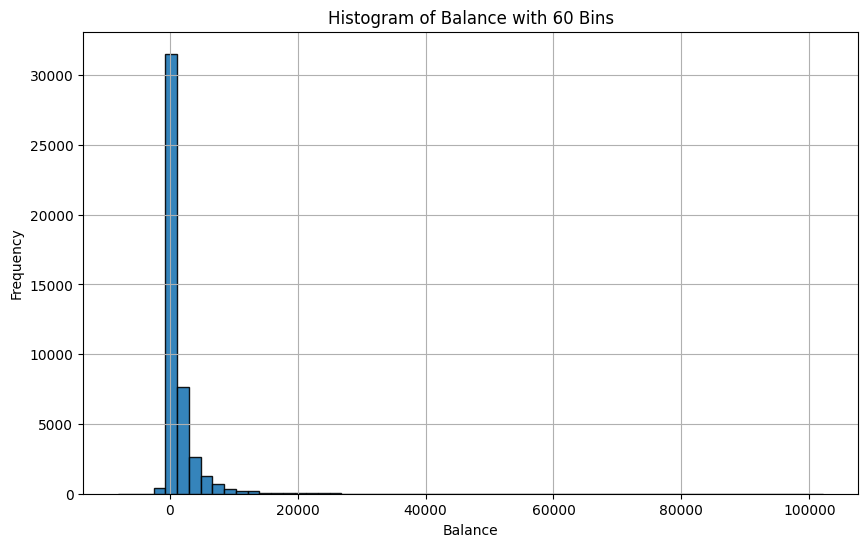

In [ ]:
# Plot histogram of the 'balance' attribute with more bins
plt.figure(figsize=(10, 6))
plt.hist(df['balance'], bins=60, edgecolor='k', alpha=0.9)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance with 60 Bins')
plt.grid(True)
plt.show()

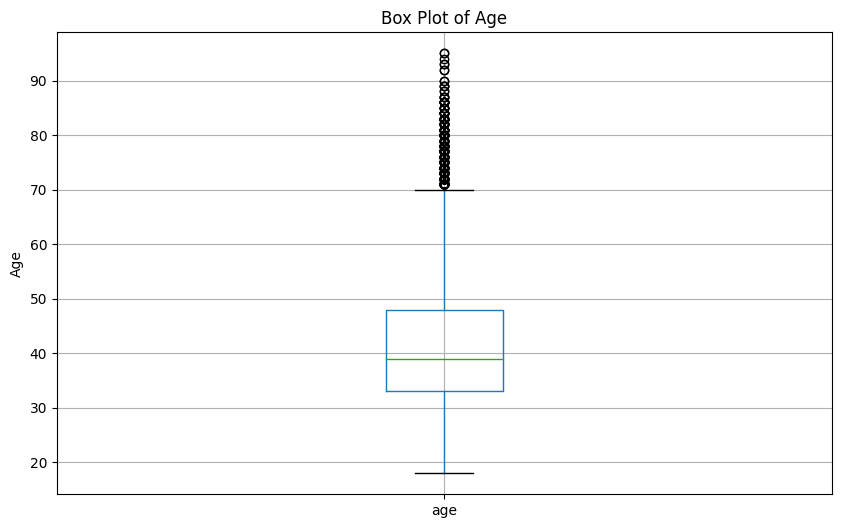

In [ ]:
# Plot a boxplot of the 'age' attribute
# Plot boxplot of the 'age' attribute
plt.figure(figsize=(10, 6))
df.boxplot(column=['age'])
plt.ylabel('Age')
plt.title('Box Plot of Age')
plt.show()

3) Plot separately the distributions of balance values for people with negative outcome and positive outcomes. Are they different? If so, how?

In [ ]:
negative_outcome = df[df['outcome'] == 'no']
positive_outcome = df[df['outcome'] == 'yes']
print("Count of Negative Outcome:", negative_outcome.shape[0])
print("Count of Positive Outcome:", positive_outcome.shape[0])
# Determine the maximum frequency for y-axis limit
max_frequency = max(negative_outcome['balance'].value_counts().max(), positive_outcome['balance'].value_counts().max())

Count of Negative Outcome: 39922
Count of Positive Outcome: 5289


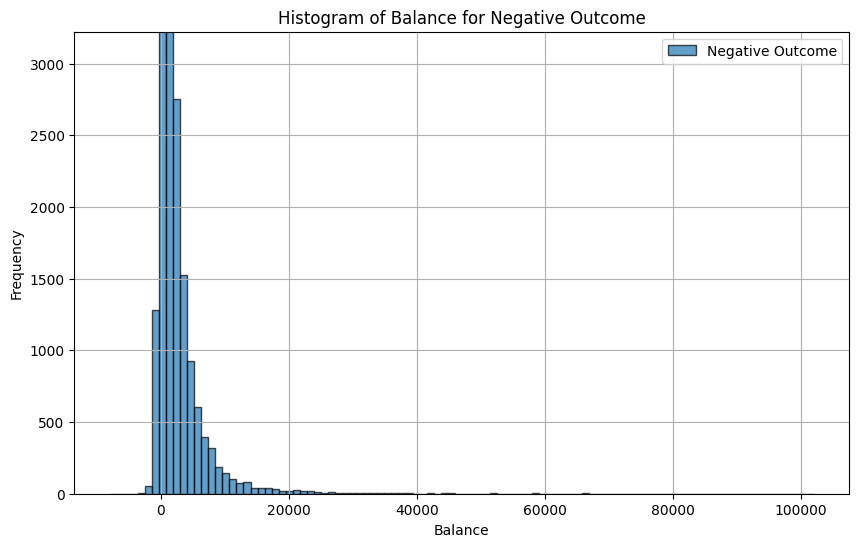

In [ ]:
# Plot histogram of the 'balance' attribute for negative outcome
plt.figure(figsize=(10, 6))
plt.hist(negative_outcome['balance'], bins=100, edgecolor='k', alpha=0.7, label='Negative Outcome')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance for Negative Outcome')
plt.ylim(0, max_frequency)
plt.legend()
plt.grid(True)
plt.show()

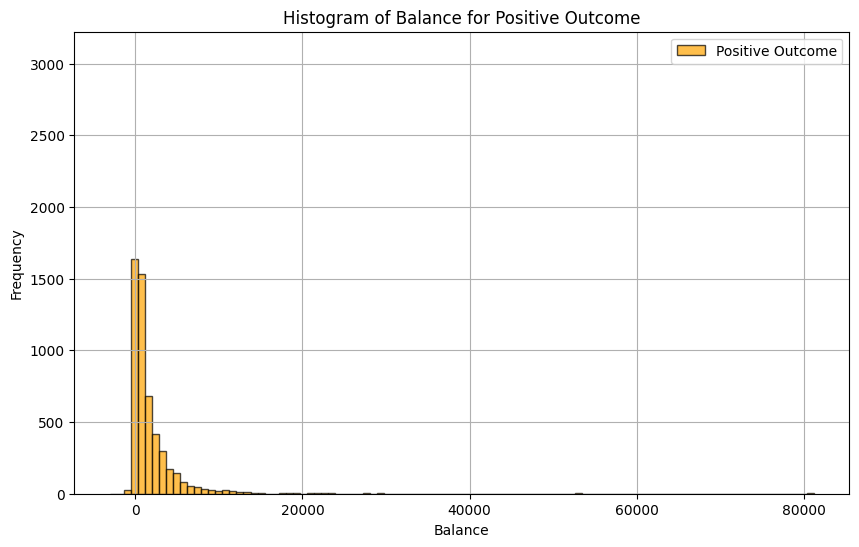

In [ ]:
# Plot histogram of the 'balance' attribute for positive outcome
plt.figure(figsize=(10, 6))
plt.hist(positive_outcome['balance'], bins=100, edgecolor='k', alpha=0.7, color='orange', label='Positive Outcome')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance for Positive Outcome')
plt.ylim(0, max_frequency)
plt.legend()
plt.grid(True)
plt.show()

# Q2

## Missing Values

1) Which of the attributes have missing values? How many?

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Attributes with missing values and their counts:\n", missing_values)

Attributes with missing values and their counts:
 days_from_last_contact    36954
dtype: int64


2) Create another dataframe, which doesn't include any people with 'contact' which is 'cellular' or 'telephone'

In [ ]:
# Filter the DataFrame to exclude rows where 'isContactKnown' is True
filtered_df = df.loc[~df['isContactKnown']]
frequency_counts = filtered_df['isContactKnown'].value_counts()
# before
print("Frequency count for 'isContactKnown' in filtered DataFrame:\n", frequency_counts)
#after
print("Frequency count for 'isContactKnown' in filtered DataFrame:\n", df['isContactKnown'].value_counts())

Frequency count for 'isContactKnown' in filtered DataFrame:
 isContactKnown
False    13020
Name: count, dtype: int64
Frequency count for 'isContactKnown' in filtered DataFrame:
 isContactKnown
True     32191
False    13020
Name: count, dtype: int64


3) Look at the missing values in the 'days_from_last_contact' attribute. What do you think these missing values might represent? Can you find support in the table for your assumption? Hint: The attribute names have a meaning.

In [ ]:
# Check for missing values in 'days_from_last_contact'
missing_values_count = df['days_from_last_contact'].isnull().sum()
print(f"Number of missing values in 'days_from_last_contact': {missing_values_count}")

# Check for 'unknown' in 'previous_campaign_outcome'
unknown_outcome_count = df[df['previous_campaign_outcome'] == 'unknown'].shape[0]
print(f"Number of 'unknown' in 'previous_campaign_outcome': {unknown_outcome_count}")

Number of missing values in 'days_from_last_contact': 36954
Number of 'unknown' in 'previous_campaign_outcome': 36959


In [ ]:
# The number of missing values in 'days_from_last_contact' is almost equal to
# the number of rows where 'previous_campaign_outcome' is 'unknown'.
# Thus we asume there is a strong correlation between the two attributes.

# Find rows where 'days_from_last_contact' is NaN, 'previous_campaign_outcome' is 'unknown', and 'outcome' is 'no'
correlated_rows = df[df['days_from_last_contact'].isnull() & (df['previous_campaign_outcome'] == 'unknown') & (df['outcome'] == 'no')]
correlated_count = correlated_rows.shape[0]
print(f"Number of rows where 'days_from_last_contact' is NaN, 'previous_campaign_outcome' is 'unknown', and 'outcome' is 'no': {correlated_count}")

# In addition we can see that most of the rows with missing days_from_last_contact and unknown previous_campaign_outcome also share a negative outcome which supports the
# Assumptions that those customer did not even participate in a marketing campaign (maybe because they are new customers or, alternatively, opted out from marketing campaigns).


Number of rows where 'days_from_last_contact' is NaN, 'previous_campaign_outcome' is 'unknown', and 'outcome' is 'no': 33570


In [ ]:
# Calculate the proportion of correlated rows out of total missing 'days_from_last_contact'
correlation_proportion = correlated_count / missing_values_count
print(f"Proportion of correlated rows: {correlation_proportion:.2%}")

Proportion of correlated rows: 90.84%


## Discretization

In class, you've seen three methods of data discretization, and we will focus on two of them - Equal-width (distance) and Equal-depth (frequency).

1) Discretize the balance attribute to 7 intervals using equal-width discretization, and plot the frequency table for them.

Frequency table for 'balance' using equal-width discretization:
 balance_bin
(-8129.146, 7716.143]     43836
(7716.143, 23451.286]      1254
(23451.286, 39186.429]       92
(39186.429, 54921.571]       16
(54921.571, 70656.714]        8
(70656.714, 86391.857]        3
(86391.857, 102127.0]         2
Name: count, dtype: int64


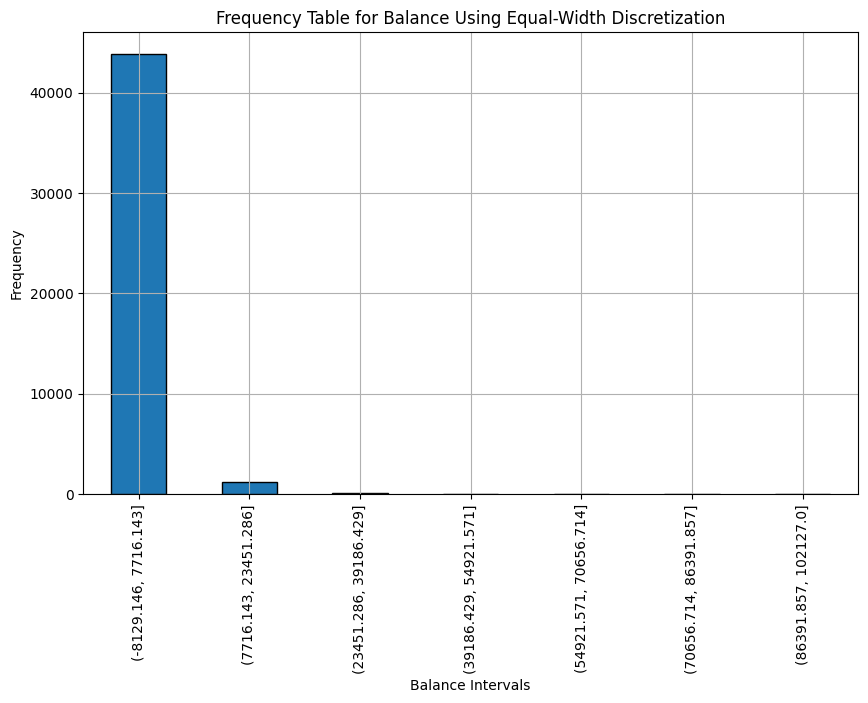

In [ ]:
# Discretize the 'balance' attribute into 7 intervals using equal-width binning
df['balance_bin'] = pd.cut(df['balance'], bins=7)

# Plot the frequency table for the 'balance' intervals
balance_frequency = df['balance_bin'].value_counts().sort_index()
print("Frequency table for 'balance' using equal-width discretization:\n", balance_frequency)

# Plotting the frequency table
plt.figure(figsize=(10, 6))
balance_frequency.plot(kind='bar', edgecolor='black')
plt.xlabel('Balance Intervals')
plt.ylabel('Frequency')
plt.title('Frequency Table for Balance Using Equal-Width Discretization')
plt.grid(True)
plt.show()

2) Discretize the age attribute into 6 intervals using equal-depth discretization, and plot the frequency table for them.

Frequency table for 'age' using equal-depth discretization:
 age_bin
(17.999, 31.0]    9026
(31.0, 35.0]      7881
(35.0, 39.0]      6455
(39.0, 45.0]      7401
(45.0, 52.0]      7040
(52.0, 95.0]      7408
Name: count, dtype: int64


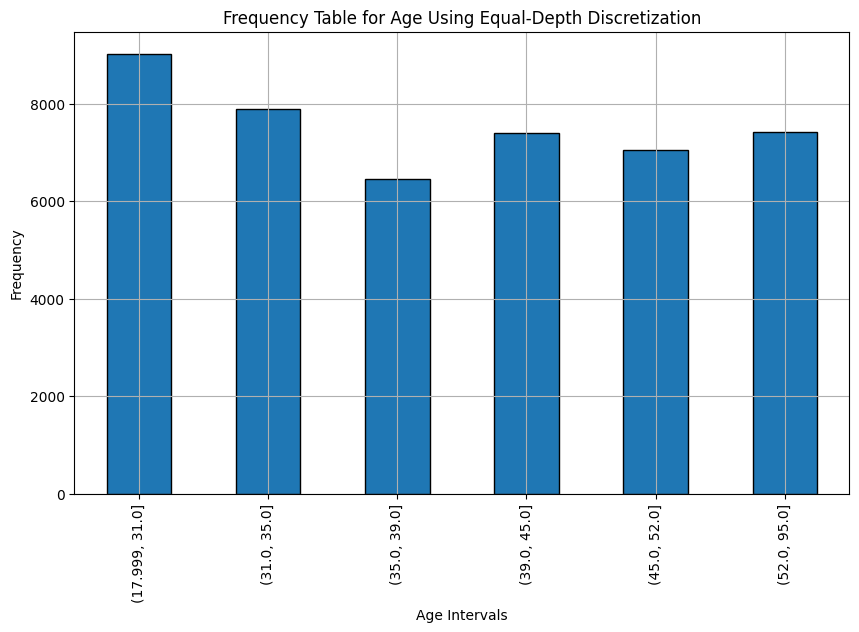

In [ ]:
# Discretize the 'age' attribute into 6 intervals using equal-depth binning
df['age_bin'] = pd.qcut(df['age'], q=6)

# Plot the frequency table for the 'age' intervals
age_frequency = df['age_bin'].value_counts().sort_index()
print("Frequency table for 'age' using equal-depth discretization:\n", age_frequency)

# Plotting the frequency table
plt.figure(figsize=(10, 6))
age_frequency.plot(kind='bar', edgecolor='black')
plt.xlabel('Age Intervals')
plt.ylabel('Frequency')
plt.title('Frequency Table for Age Using Equal-Depth Discretization')
plt.grid(True)
plt.show()

3) Propose a way to further discretize the Month column.

We can start with simple methods and move towards more sophisticated approaches to discretize the month column:

Equal-Width Discretization (12 bins): This naive method involves calculating the frequency table for each month and visualizing the distribution of data across all 12 months. It treats each month as a separate category.

Quarterly Discretization: Group the months into four quarters (Q1, Q2, Q3, Q4). This method helps in understanding which part of the year is the busiest by aggregating data into broader time frames.

Seasonal Discretization: Group the months into seasons (Winter, Spring, Summer, Autumn) to observe seasonal trends in the data. This approach can reveal how seasonal changes affect the dataset.

Equal-Depth Discretization: For a more sophisticated method, we can assign numeric values to each month (1 for January, 2 for February, up to 12 for December) and use the qcut function to create quantile-based bins. This method orders the months into a sequence and calculates quantiles, ensuring each bin has an approximately equal number of observations.

**For example, let's implement the Quarterly Discretization as it's a common method in the industry:**

Frequency table for 'quarter':
 quarter
Q1     4529
Q2    22039
Q3    13721
Q4     4922
Name: count, dtype: int64


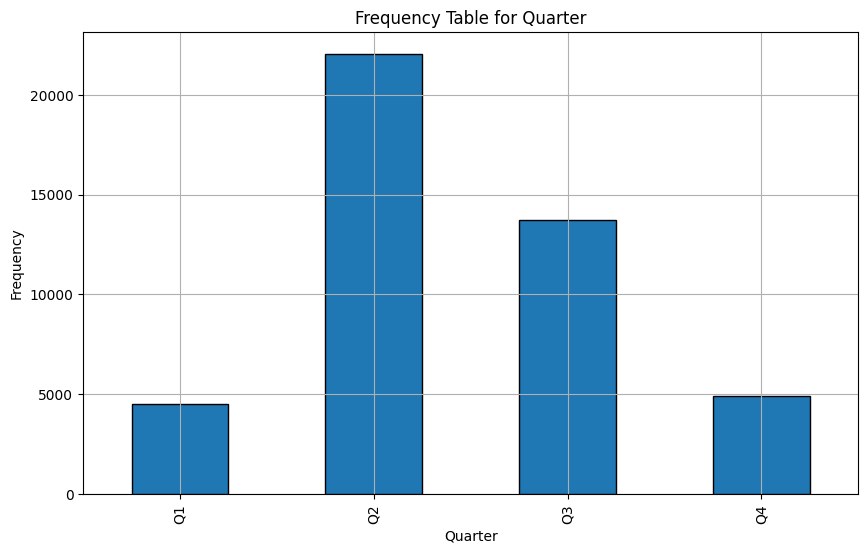

In [ ]:
# Define a function to map months to quarters
def month_to_quarter(month):
    if month in ['jan', 'feb', 'mar']:
        return 'Q1'
    elif month in ['apr', 'may', 'jun']:
        return 'Q2'
    elif month in ['jul', 'aug', 'sep']:
        return 'Q3'
    elif month in ['oct', 'nov', 'dec']:
        return 'Q4'

# Apply the function to create a new column 'quarter'
df['quarter'] = df['month'].apply(month_to_quarter)

# Plot the frequency table for the 'quarter' column
quarter_frequency = df['quarter'].value_counts().sort_index()
print("Frequency table for 'quarter':\n", quarter_frequency)

# Plotting the frequency table
plt.figure(figsize=(10, 6))
quarter_frequency.plot(kind='bar', edgecolor='black')
plt.xlabel('Quarter')
plt.ylabel('Frequency')
plt.title('Frequency Table for Quarter')
plt.grid(True)
plt.show()

# Q3

## Correlation

1) Calculate the pearson and spearman correlation between age and balance.

In [ ]:
# Calculate Pearson correlation
pearson_corr = df['age'].corr(df['balance'], method='pearson')
print(f"Pearson correlation between age and balance: {pearson_corr}")

# Calculate Spearman correlation
spearman_corr = df['age'].corr(df['balance'], method='spearman')
print(f"Spearman correlation between age and balance: {spearman_corr}")

Pearson correlation between age and balance: 0.09778273937134754
Spearman correlation between age and balance: 0.096380304771986


2) Calculate the full pearson correlation matrix for all the numeric columns in the data.

In [ ]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the Pearson correlation matrix
pearson_corr_matrix = numeric_columns.corr()

# Display the Pearson correlation matrix
print("Pearson correlation matrix for all numeric columns:\n", pearson_corr_matrix)

Pearson correlation matrix for all numeric columns:
                                  age   balance       day  duration  days_from_last_contact  previous_campaign_contacts
age                         1.000000  0.097783 -0.009120 -0.004648               -0.107863                    0.001288
balance                     0.097783  1.000000  0.004503  0.021560               -0.108122                    0.016674
day                        -0.009120  0.004503  1.000000 -0.030206               -0.090095                   -0.051710
duration                   -0.004648  0.021560 -0.030206  1.000000               -0.024407                    0.001203
days_from_last_contact     -0.107863 -0.108122 -0.090095 -0.024407                1.000000                   -0.021885
previous_campaign_contacts  0.001288  0.016674 -0.051710  0.001203               -0.021885                    1.000000


## Mutual Information

Calcalate the entropy of each of the attributes in the data. Which has the biggest entropy?

In [ ]:
# Function to calculate entropy for a given column
def calculate_entropy(column):
    # Get value counts of the column
    value_counts = column.value_counts(normalize=True)
    # Calculate entropy
    return entropy(value_counts)

# Calculate entropy for each attribute
entropies = df.apply(calculate_entropy)

# Print the entropies
print("Entropy of each attribute:\n", entropies)

# Identify the attribute with the highest entropy
max_entropy_attr = entropies.idxmax()
max_entropy_value = entropies.max()

print(f"\nAttribute with the highest entropy: {max_entropy_attr}")
print(f"Highest entropy value: {max_entropy_value}")

Entropy of each attribute:
 age                           3.687519
job                           2.117809
marital                       0.911676
education                     1.119365
default_credit                0.090256
balance                       7.789099
housing_loan                  0.686898
personal_loan                 0.440045
contact                       0.816198
day                           3.353950
month                         2.036037
duration                      6.455809
campaign                      1.762949
days_from_last_contact        5.673774
previous_campaign_contacts    0.828597
previous_campaign_outcome     0.649489
outcome                       0.360874
isContactKnown                0.600336
balance_bin                   0.147415
age_bin                       1.786301
quarter                       1.184056
dtype: float64

Attribute with the highest entropy: balance
Highest entropy value: 7.789099488898226


Which attribute has the highest Mutual Information with the 'outcome' attribute?

In [ ]:
# Hint: try to find a function from the sklearn.metrics that fits the needs of the question
import sklearn.metrics

# Drop rows with any NaN values
df_dropped = df.dropna()
mutual_info_outcome = df_dropped.apply(lambda x: sklearn.metrics.mutual_info_score(df_dropped["outcome"], x))
print (mutual_info_outcome)
print ("'days_from_last_contact' attribute has the highest Mutual Information with 'outcome'")


age                           0.020368
job                           0.023300
marital                       0.001239
education                     0.006569
default_credit                0.000491
balance                       0.250659
housing_loan                  0.049283
personal_loan                 0.007732
contact                       0.000127
day                           0.032625
month                         0.060376
duration                      0.153781
campaign                      0.005939
days_from_last_contact        0.118423
previous_campaign_contacts    0.004476
previous_campaign_outcome     0.095574
outcome                       0.540137
isContactKnown                0.000091
balance_bin                   0.000911
age_bin                       0.007913
quarter                       0.028141
dtype: float64
'days_from_last_contact' attribute has the highest Mutual Information with 'outcome'


# Q4

## Outliers

Does the campaign column in the table have any outliers? Support your claim with a relevant plot.

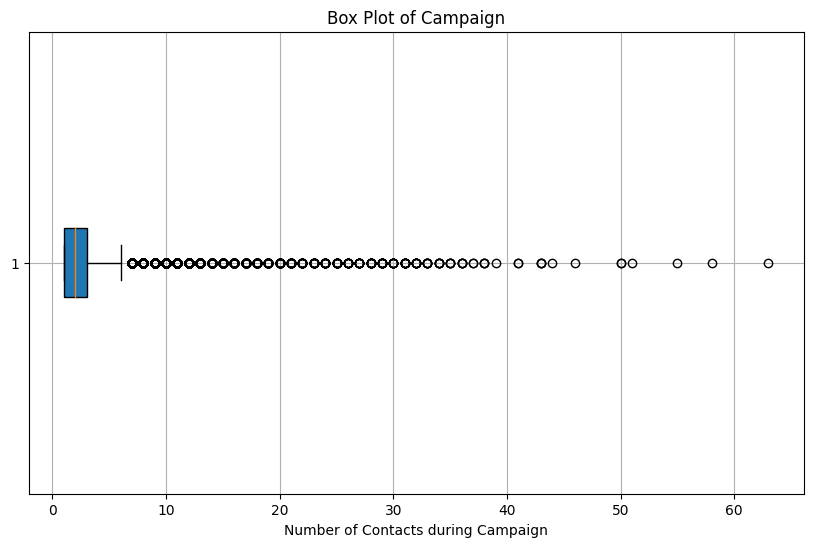

In [ ]:
# Plot the box plot for the 'campaign' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['campaign'], vert=False, patch_artist=True)
plt.xlabel('Number of Contacts during Campaign')
plt.title('Box Plot of Campaign')
plt.grid(True)
plt.show()

## Normalization

Think of an appropriate normalization method and normalize the days_from_last_contact column in the table. Why did you choose this method?

   days_from_last_contact  days_from_last_contact_log  days_from_last_contact_z
0                     NaN                         NaN                       NaN
1                     NaN                         NaN                       NaN
2                     NaN                         NaN                       NaN
3                     NaN                         NaN                       NaN
4                     NaN                         NaN                       NaN


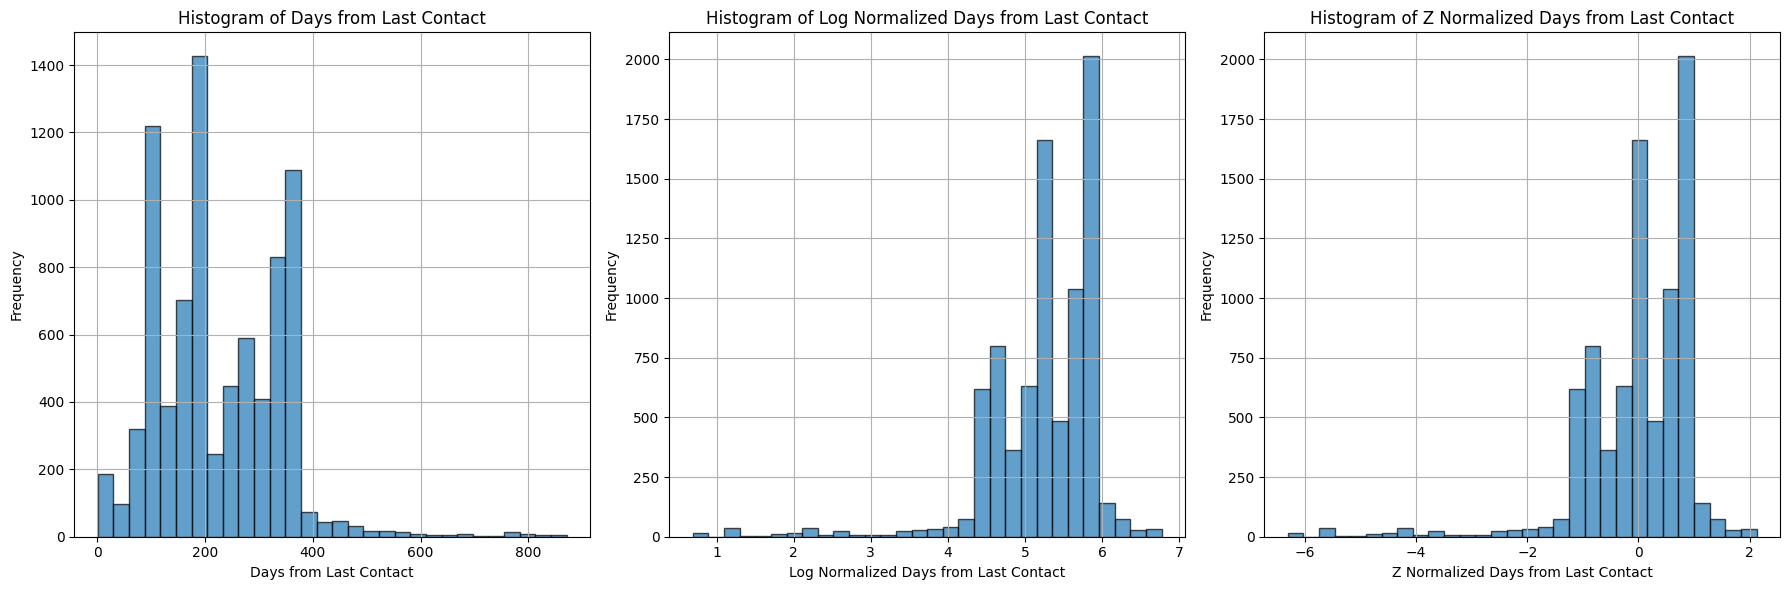

In [ ]:
# Log normalization
df['days_from_last_contact_log'] = np.log(df['days_from_last_contact'] + 1)

# Z-score normalization
scaler = StandardScaler()
df['days_from_last_contact_z'] = scaler.fit_transform(df[['days_from_last_contact_log']])

# Display the first few rows to verify normalization
print(df[['days_from_last_contact', 'days_from_last_contact_log', 'days_from_last_contact_z']].head())

# Plot the distributions
plt.figure(figsize=(18, 6))

# Original data
plt.subplot(1, 3, 1)
plt.hist(df['days_from_last_contact'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Days from Last Contact')
plt.ylabel('Frequency')
plt.title('Histogram of Days from Last Contact')
plt.grid(True)

# Log normalized data
plt.subplot(1, 3, 2)
plt.hist(df['days_from_last_contact_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Log Normalized Days from Last Contact')
plt.ylabel('Frequency')
plt.title('Histogram of Log Normalized Days from Last Contact')
plt.grid(True)

# Z-score normalized data
plt.subplot(1, 3, 3)
plt.hist(df['days_from_last_contact_z'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Z Normalized Days from Last Contact')
plt.ylabel('Frequency')
plt.title('Histogram of Z Normalized Days from Last Contact')
plt.grid(True)

plt.tight_layout()
plt.show()